In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_23452/3822274749.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_panda = data_panda.drop('car name',1)


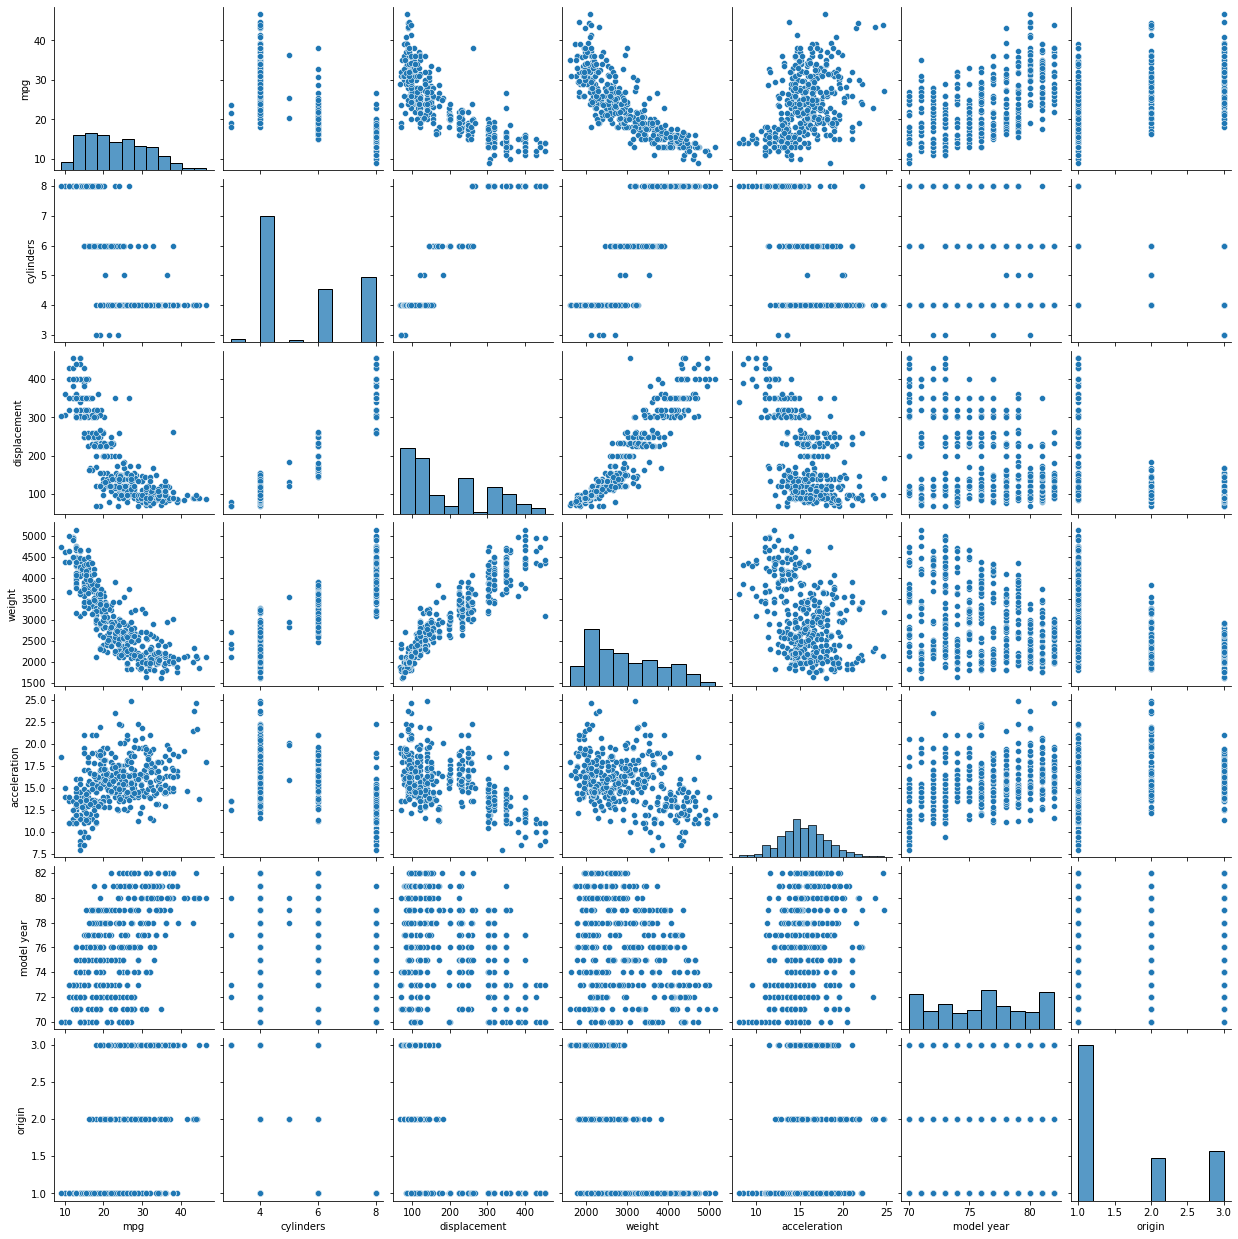

In [2]:
data_panda = pd.read_csv("./auto-mpg.csv")
data_panda.head()

data_panda = data_panda.drop('car name',1)

data_panda = data_panda.drop(data_panda[data_panda["horsepower"] == "?"].index)

sns.pairplot(data_panda)
plt.show()

### First I am just removing the 'car name' field. The pairplot shows some correlation between all the features and mpg. Right now I will just run the a linear regression using sklearn, a neural made using tensor flow and single layer using tensor flow. The performance of the three will be compared. 

### I am not doing 1 hot encoding for cylinder, model year and origin for now

In [3]:

data_panda = data_panda.astype(float)

##dataframe is shuffled
data_panda = data_panda.sample(frac=1).reset_index(drop=True)

#test and validation sets
train_data = data_panda[:-79]
test_data = data_panda[-79:]

#normalization of features
quant_features = ['mpg','displacement', 'horsepower', 'weight']
scaled_features = {}
for each in quant_features:
    mean, std = train_data[each].mean(), train_data[each].std()
    scaled_features[each] = [mean, std]
    train_data.loc[:, each] = (train_data[each] - mean)/std
    test_data.loc[:, each] = (test_data[each] - mean)/std
    

train_target, train_inputs = train_data['mpg'],train_data.drop('mpg',axis=1)
test_target, test_inputs = test_data['mpg'],test_data.drop('mpg',axis=1)

print(train_inputs)

train_target = train_target.to_numpy()
train_inputs = train_inputs.to_numpy()

test_target = test_target.to_numpy()
test_inputs = test_inputs.to_numpy()

     cylinders  displacement  horsepower    weight  acceleration  model year  \
0          3.0     -1.208636   -0.217822 -0.781811          13.5        72.0   
1          4.0     -0.859783   -0.845384 -0.828779          17.0        80.0   
2          4.0     -0.963496   -0.920692 -0.947372          18.0        72.0   
3          4.0     -0.548643   -0.493949 -0.241684          15.6        82.0   
4          6.0      0.563916   -0.268027  0.231514          17.8        76.0   
..         ...           ...         ...       ...           ...         ...   
308        8.0      1.440763    0.911789  1.242491          14.3        79.0   
309        6.0      0.252776    0.108510  0.427604          16.6        79.0   
310        4.0     -1.010638   -0.945794 -1.204519          17.6        82.0   
311        4.0     -0.954067   -0.970897 -1.186906          16.4        77.0   
312        6.0      0.488488   -0.142515  0.921937          17.0        74.0   

     origin  
0       3.0  
1       3.0

C:\Users\saksh\.conda\envs\tf\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


0.7885559694923404
Root Mean Squared Error: 0.450


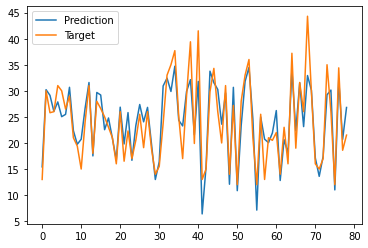

In [4]:
regr = linear_model.LinearRegression()
regr.fit(train_inputs, train_target)

prediction  = regr.predict(test_inputs)
print(regr.score(test_inputs,test_target))

print("Root Mean Squared Error: {:.3f}".format(np.sqrt(np.mean((test_target-prediction)**2))))


prediction = prediction*scaled_features['mpg'][1] + scaled_features['mpg'][0]
test_target1 = test_target*scaled_features['mpg'][1] + scaled_features['mpg'][0]
#Values are unnormalised
plt.plot(prediction, label = 'Prediction')
plt.plot(test_target1, label = 'Target')
plt.legend()


Epoch 1/1000
8/8 [==============================] - 2s 58ms/step - loss: 7.5145 - mae: 1.9362 - mse: 7.5145 - val_loss: 0.7912 - val_mae: 0.7032 - val_mse: 0.7912
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.5305 - mae: 0.9920 - mse: 1.5305 - val_loss: 1.5698 - val_mae: 1.0958 - val_mse: 1.5698
Epoch 3/1000
8/8 [==============================] - 0s 10ms/step - loss: 2.0689 - mae: 1.2056 - mse: 2.0689 - val_loss: 3.5216 - val_mae: 1.7643 - val_mse: 3.5216
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.6125 - mae: 0.9995 - mse: 1.6125 - val_loss: 0.8734 - val_mae: 0.8033 - val_mse: 0.8734
Epoch 5/1000
8/8 [==============================] - 0s 11ms/step - loss: 2.5192 - mae: 1.3566 - mse: 2.5192 - val_loss: 0.6365 - val_mae: 0.6749 - val_mse: 0.6365
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.6255 - mae: 0.6354 - mse: 0.6255 - val_loss: 1.7826 - val_mae: 1.2349 - val_mse: 1.7826
Epoch 7/1000
8/8 [=======

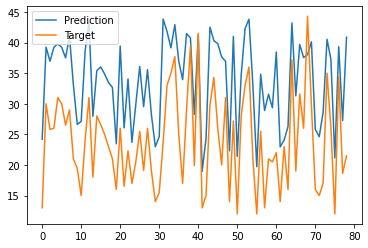

In [5]:

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape= [train_inputs.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()


EPOCHS = 1000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(train_inputs, train_target, 
                    epochs=EPOCHS, validation_split = 0.2, 
                    callbacks=[early_stop])


prediction = model(test_inputs)
print("Root Mean Squared Error: {:.3f}".format(np.sqrt(np.mean((test_target-prediction)**2))))

prediction = prediction*scaled_features['mpg'][1] + scaled_features['mpg'][0]
test_target1 = test_target*scaled_features['mpg'][1] + scaled_features['mpg'][0]
#Values are unnormalised
plt.plot(prediction, label = 'Prediction')
plt.plot(test_target1, label = 'Target')
plt.legend()

In [6]:

def build_model():
  model = keras.Sequential([
    layers.Dense(1, activation='relu', input_shape= [train_inputs.shape[1]])
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()


EPOCHS = 1000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(train_inputs, train_target, 
                    epochs=EPOCHS, validation_split = 0.2, 
                    callbacks=[early_stop])

Epoch 1/1000
8/8 [==============================] - 1s 45ms/step - loss: 1.0505 - mae: 0.8550 - mse: 1.0505 - val_loss: 0.7836 - val_mae: 0.7794 - val_mse: 0.7836
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.0505 - mae: 0.8550 - mse: 1.0505 - val_loss: 0.7836 - val_mae: 0.7794 - val_mse: 0.7836
Epoch 3/1000
8/8 [==============================] - 0s 11ms/step - loss: 1.0505 - mae: 0.8550 - mse: 1.0505 - val_loss: 0.7836 - val_mae: 0.7794 - val_mse: 0.7836
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.0505 - mae: 0.8550 - mse: 1.0505 - val_loss: 0.7836 - val_mae: 0.7794 - val_mse: 0.7836
Epoch 5/1000
8/8 [==============================] - 0s 11ms/step - loss: 1.0505 - mae: 0.8550 - mse: 1.0505 - val_loss: 0.7836 - val_mae: 0.7794 - val_mse: 0.7836
Epoch 6/1000
8/8 [==============================] - 0s 10ms/step - loss: 1.0505 - mae: 0.8550 - mse: 1.0505 - val_loss: 0.7836 - val_mae: 0.7794 - val_mse: 0.7836
Epoch 7/1000
8/8 [======

Root Mean Squared Error: 0.981


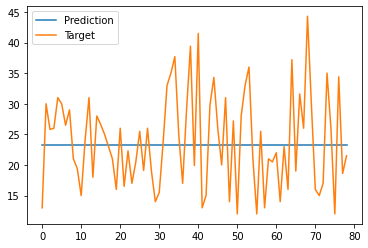

In [7]:
prediction = model(test_inputs)
print("Root Mean Squared Error: {:.3f}".format(np.sqrt(np.mean((test_target-prediction)**2))))

prediction = prediction*scaled_features['mpg'][1] + scaled_features['mpg'][0]
test_target1 = test_target*scaled_features['mpg'][1] + scaled_features['mpg'][0]
#Values are unnormalised
plt.plot(prediction, label = 'Prediction')
plt.plot(test_target1, label = 'Target')
plt.legend()

# We can see that the results are not good. After analysing the corrrelation, it can be observed that there is a strong correlation between mpg and weight and displacement. 

# One hot encoding also improves the accuracy

In [8]:
data_panda = pd.read_csv("./auto-mpg.csv")
data_panda.head()

data_panda = data_panda.drop('car name',1)

data_panda = data_panda.drop(data_panda[data_panda["horsepower"] == "?"].index)

data_panda_dropped = data_panda.drop(['origin','model year'],1)
correlation  = data_panda_dropped.corr()
correlation


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_23452/129165032.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_panda = data_panda.drop('car name',1)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_23452/129165032.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_panda_dropped = data_panda.drop(['origin','model year'],1)


,mpg,cylinders,displacement,weight,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.950823,0.897527,-0.504683
displacement,-0.805127,0.950823,1.000000,0.932994,-0.543800
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.543800,-0.416839,1.000000


In [9]:
dummy_fields = ['cylinders', 'model year', 'origin']
for each in dummy_fields:
    dummies = pd.get_dummies(data_panda[each], prefix=each, drop_first=False)
    data_panda = pd.concat([data_panda, dummies], axis=1)

data_panda = data_panda.astype(float)


In [10]:

data_panda = data_panda.drop(['cylinders'],axis = 1)
data_panda = data_panda.sample(frac=1).reset_index(drop=True)

train_data = data_panda[:-79]
test_data = data_panda[-79:]

quant_features = ['mpg','displacement', 'horsepower', 'weight']
scaled_features = {}
for each in quant_features:
    mean, std = train_data[each].mean(), train_data[each].std()
    scaled_features[each] = [mean, std]
    train_data.loc[:, each] = (train_data[each] - mean)/std
    test_data.loc[:, each] = (test_data[each] - mean)/std
    

train_target, train_inputs = train_data['mpg'],train_data.drop('mpg',axis=1)
test_target, test_inputs = test_data['mpg'],test_data.drop('mpg',axis=1)

print(train_inputs)

train_target = train_target.to_numpy()
train_inputs = train_inputs.to_numpy()

test_target = test_target.to_numpy()
test_inputs = test_inputs.to_numpy()

     displacement  horsepower    weight  acceleration  model year  origin  \
0        0.581367   -0.398915  0.469193          22.2        79.0     1.0   
1        0.562737   -0.272666  0.209345          17.8        76.0     1.0   
2        1.419714    1.873570  1.704327          12.5        73.0     1.0   
3        0.022469   -0.449415  0.057100          17.1        81.0     1.0   
4       -0.713413    0.232331 -0.246246          15.7        78.0     2.0   
..            ...         ...       ...           ...         ...     ...   
308      0.255343   -0.020168  0.126927          16.5        73.0     1.0   
309     -1.104642   -0.979661 -1.213520          19.0        74.0     3.0   
310      1.429029    0.813077  1.081609          13.2        79.0     1.0   
311      2.155597    2.580565  1.857717          11.0        72.0     1.0   
312     -0.536429   -0.777663 -0.535856          17.0        74.0     1.0   

     cylinders_3  cylinders_4  cylinders_5  cylinders_6  ...  model year_76

C:\Users\saksh\.conda\envs\tf\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


0.8575692460885105
Root Mean Squared Error: 0.348


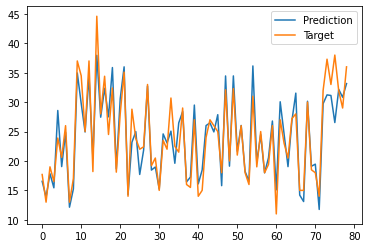

In [11]:
regr = linear_model.LinearRegression()
regr.fit(train_inputs, train_target)

prediction  = regr.predict(test_inputs)
print(regr.score(test_inputs,test_target))

print("Root Mean Squared Error: {:.3f}".format(np.sqrt(np.mean((test_target-prediction)**2))))


prediction = prediction*scaled_features['mpg'][1] + scaled_features['mpg'][0]
test_target1 = test_target*scaled_features['mpg'][1] + scaled_features['mpg'][0]
#Values are unnormalised
plt.plot(prediction, label = 'Prediction')
plt.plot(test_target1, label = 'Target')
plt.legend()


In [12]:

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape= [train_inputs.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()


EPOCHS = 1000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(train_inputs, train_target, 
                    epochs=EPOCHS, validation_split = 0.2, 
                    callbacks=[early_stop])


Epoch 1/1000
8/8 [==============================] - 1s 45ms/step - loss: 6.9757 - mae: 1.7214 - mse: 6.9757 - val_loss: 1.4997 - val_mae: 1.0006 - val_mse: 1.4997
Epoch 2/1000
8/8 [==============================] - 0s 12ms/step - loss: 1.3651 - mae: 0.9641 - mse: 1.3651 - val_loss: 1.1959 - val_mae: 0.9090 - val_mse: 1.1959
Epoch 3/1000
8/8 [==============================] - 0s 11ms/step - loss: 1.1757 - mae: 0.8764 - mse: 1.1757 - val_loss: 0.9319 - val_mae: 0.7771 - val_mse: 0.9319
Epoch 4/1000
8/8 [==============================] - 0s 11ms/step - loss: 2.7264 - mae: 1.4130 - mse: 2.7264 - val_loss: 0.9249 - val_mae: 0.7502 - val_mse: 0.9249
Epoch 5/1000
8/8 [==============================] - 0s 11ms/step - loss: 1.5781 - mae: 1.0280 - mse: 1.5781 - val_loss: 0.7878 - val_mae: 0.6799 - val_mse: 0.7878
Epoch 6/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.9212 - mae: 0.7519 - mse: 0.9212 - val_loss: 3.6210 - val_mae: 1.7685 - val_mse: 3.6210
Epoch 7/1000
8/8 [====

Root Mean Squared Error: 1.211


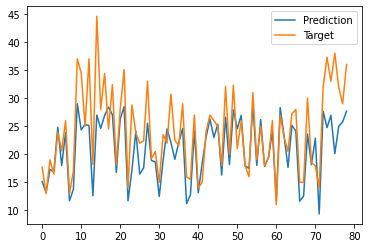

In [13]:
prediction = model(test_inputs)
print("Root Mean Squared Error: {:.3f}".format(np.sqrt(np.mean((test_target-prediction)**2))))

prediction = prediction*scaled_features['mpg'][1] + scaled_features['mpg'][0]
test_target1 = test_target*scaled_features['mpg'][1] + scaled_features['mpg'][0]
#Values are unnormalised
plt.plot(prediction, label = 'Prediction')
plt.plot(test_target1, label = 'Target')
plt.legend()


In [16]:


def build_model():
  model = keras.Sequential([
    layers.Dense(1, activation='linear', input_shape= [train_inputs.shape[1]])
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()


EPOCHS = 1000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(train_inputs, train_target, 
                    epochs=EPOCHS, validation_split = 0.2, 
                    callbacks=[early_stop])

Epoch 1/1000
8/8 [==============================] - 1s 30ms/step - loss: 324.0649 - mae: 17.9097 - mse: 324.0649 - val_loss: 303.0156 - val_mae: 17.3315 - val_mse: 303.0156
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 286.3133 - mae: 16.8308 - mse: 286.3133 - val_loss: 272.9718 - val_mae: 16.4462 - val_mse: 272.9718
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 258.8771 - mae: 15.9992 - mse: 258.8771 - val_loss: 247.3827 - val_mae: 15.6528 - val_mse: 247.3827
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 234.5852 - mae: 15.2277 - mse: 234.5852 - val_loss: 223.9871 - val_mae: 14.8905 - val_mse: 223.9871
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 212.2329 - mae: 14.4790 - mse: 212.2329 - val_loss: 202.2788 - val_mae: 14.1467 - val_mse: 202.2788
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 191.3568 - mae: 13.7435 - mse: 191.3568 - val_loss: 181.8895 - val_

8/8 [==============================] - 0s 7ms/step - loss: 0.4840 - mae: 0.5406 - mse: 0.4840 - val_loss: 0.4026 - val_mae: 0.4897 - val_mse: 0.4026
Epoch 51/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.4743 - mae: 0.5378 - mse: 0.4743 - val_loss: 0.3904 - val_mae: 0.4807 - val_mse: 0.3904
Epoch 52/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.4564 - mae: 0.5259 - mse: 0.4564 - val_loss: 0.3801 - val_mae: 0.4676 - val_mse: 0.3801
Epoch 53/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.4541 - mae: 0.5251 - mse: 0.4541 - val_loss: 0.3763 - val_mae: 0.4631 - val_mse: 0.3763
Epoch 54/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.4415 - mae: 0.5158 - mse: 0.4415 - val_loss: 0.3636 - val_mae: 0.4565 - val_mse: 0.3636
Epoch 55/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.4287 - mae: 0.5098 - mse: 0.4287 - val_loss: 0.3601 - val_mae: 0.4637 - val_mse: 0.3601
Epoch 56/1000
8/8 [=================

8/8 [==============================] - 0s 7ms/step - loss: 0.2004 - mae: 0.3348 - mse: 0.2004 - val_loss: 0.1620 - val_mae: 0.3044 - val_mse: 0.1620
Epoch 101/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1968 - mae: 0.3309 - mse: 0.1968 - val_loss: 0.1630 - val_mae: 0.3088 - val_mse: 0.1630
Epoch 102/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2028 - mae: 0.3329 - mse: 0.2028 - val_loss: 0.1667 - val_mae: 0.3158 - val_mse: 0.1667
Epoch 103/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1915 - mae: 0.3242 - mse: 0.1915 - val_loss: 0.1666 - val_mae: 0.3165 - val_mse: 0.1666
Epoch 104/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1922 - mae: 0.3304 - mse: 0.1922 - val_loss: 0.1597 - val_mae: 0.3062 - val_mse: 0.1597
Epoch 105/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1958 - mae: 0.3303 - mse: 0.1958 - val_loss: 0.1532 - val_mae: 0.2909 - val_mse: 0.1532
Epoch 106/1000
8/8 [===========

Epoch 150/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1511 - mae: 0.2934 - mse: 0.1511 - val_loss: 0.1245 - val_mae: 0.2746 - val_mse: 0.1245
Epoch 151/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1459 - mae: 0.2874 - mse: 0.1459 - val_loss: 0.1367 - val_mae: 0.2839 - val_mse: 0.1367
Epoch 152/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1497 - mae: 0.2926 - mse: 0.1497 - val_loss: 0.1239 - val_mae: 0.2742 - val_mse: 0.1239
Epoch 153/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1468 - mae: 0.2874 - mse: 0.1468 - val_loss: 0.1360 - val_mae: 0.2822 - val_mse: 0.1360
Epoch 154/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1438 - mae: 0.2807 - mse: 0.1438 - val_loss: 0.1294 - val_mae: 0.2776 - val_mse: 0.1294
Epoch 155/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1445 - mae: 0.2843 - mse: 0.1445 - val_loss: 0.1421 - val_mae: 0.2888 - val_mse: 0.1421
Epoch 156/1000
8

Root Mean Squared Error: 1.270


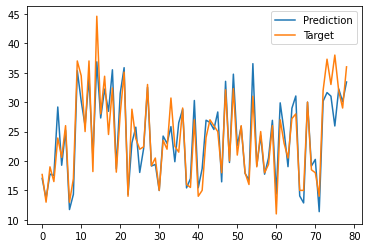

In [17]:
prediction = model(test_inputs)
print("Root Mean Squared Error: {:.3f}".format(np.sqrt(np.mean((test_target-prediction)**2))))

prediction = prediction*scaled_features['mpg'][1] + scaled_features['mpg'][0]
test_target1 = test_target*scaled_features['mpg'][1] + scaled_features['mpg'][0]
#Values are unnormalised
plt.plot(prediction, label = 'Prediction')
plt.plot(test_target1, label = 'Target')
plt.legend()

# linear regression gave the best results from all of them. So choosing linear regression

# For an input size of 9, trying another model

In [24]:
data_panda = pd.read_csv("./auto-mpg.csv")
data_panda.head()

data_panda = data_panda.drop('car name',1)

data_panda = data_panda.drop(data_panda[data_panda["horsepower"] == "?"].index)

dummy_fields = ['cylinders']
for each in dummy_fields:
    dummies = pd.get_dummies(data_panda[each], prefix=each, drop_first=False)
    data_panda = pd.concat([data_panda, dummies], axis=1)

data_panda = data_panda.astype(float)

data_panda = data_panda.drop(['cylinders','cylinders_3','cylinders_5',''],axis = 1)
data_panda = data_panda.sample(frac=1).reset_index(drop=True)

data_panda

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_23452/3325168130.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_panda = data_panda.drop('car name',1)


,mpg,displacement,horsepower,weight,acceleration,model year,origin,cylinders_4,cylinders_6,cylinders_8
0,23.0,140.0,78.0,2592.0,18.5,75.0,1.0,1.0,0.0,0.0
1,30.5,97.0,78.0,2190.0,14.1,77.0,2.0,1.0,0.0,0.0
2,27.9,156.0,105.0,2800.0,14.4,80.0,1.0,1.0,0.0,0.0
3,22.0,140.0,72.0,2408.0,19.0,71.0,1.0,1.0,0.0,0.0
4,33.0,91.0,53.0,1795.0,17.4,76.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
387,13.0,302.0,140.0,4294.0,16.0,72.0,1.0,0.0,0.0,1.0
388,22.0,108.0,94.0,2379.0,16.5,73.0,3.0,1.0,0.0,0.0
389,13.0,350.0,165.0,4274.0,12.0,72.0,1.0,0.0,0.0,1.0
390,23.0,120.0,88.0,2957.0,17.0,75.0,2.0,1.0,0.0,0.0


In [25]:
correlation  = data_panda.corr()
correlation

,mpg,displacement,horsepower,weight,acceleration,model year,origin,cylinders_4,cylinders_6,cylinders_8
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.760490,-0.230873,-0.649667
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.823346,0.118767,0.860257
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.691741,-0.039952,0.835989
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.804941,0.137179,0.800244
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.383486,0.134093,-0.560300
model year,0.580541,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.289958,-0.003914,-0.336981
origin,0.565209,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.534502,-0.247228,-0.427830
cylinders_4,0.760490,-0.823346,-0.691741,-0.804941,0.383486,0.289958,0.534502,1.000000,-0.526269,-0.606202
cylinders_6,-0.230873,0.118767,-0.039952,0.137179,0.134093,-0.003914,-0.247228,-0.526269,1.000000,-0.309407
cylinders_8,-0.649667,0.860257,0.835989,0.800244,-0.560300,-0.336981,-0.427830,-0.606202,-0.309407,1.000000


In [26]:
train_data = data_panda[:-79]
test_data = data_panda[-79:]

quant_features = ['mpg','displacement', 'horsepower', 'weight']
scaled_features = {}
for each in quant_features:
    mean, std = train_data[each].mean(), train_data[each].std()
    scaled_features[each] = [mean, std]
    train_data.loc[:, each] = (train_data[each] - mean)/std
    test_data.loc[:, each] = (test_data[each] - mean)/std
    

train_target, train_inputs = train_data['mpg'],train_data.drop('mpg',axis=1)
test_target, test_inputs = test_data['mpg'],test_data.drop('mpg',axis=1)

print(train_inputs)

train_target = train_target.to_numpy()
train_inputs = train_inputs.to_numpy()

test_target = test_target.to_numpy()
test_inputs = test_inputs.to_numpy()

     displacement  horsepower    weight  acceleration  model year  origin  \
0       -0.534359   -0.680726 -0.461855          18.5        75.0     1.0   
1       -0.942123   -0.680726 -0.929734          14.1        77.0     2.0   
2       -0.382633    0.008564 -0.219768          14.4        80.0     1.0   
3       -0.534359   -0.833902 -0.676008          19.0        71.0     1.0   
4       -0.999020   -1.318958 -1.389465          17.4        76.0     3.0   
..            ...         ...       ...           ...         ...     ...   
308      0.508758   -0.119082  0.921996          17.0        74.0     1.0   
309     -0.430047   -0.374375  0.016499          20.1        80.0     1.0   
310      2.452748    3.072077  0.113101          10.0        70.0     1.0   
311      1.457046    1.667967  1.368925          11.4        77.0     1.0   
312     -1.112814   -0.961548 -1.150871          16.0        74.0     2.0   

     cylinders_4  cylinders_6  cylinders_8  
0            1.0          0.0 

C:\Users\saksh\.conda\envs\tf\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


0.8387018671694073
Root Mean Squared Error: 0.410


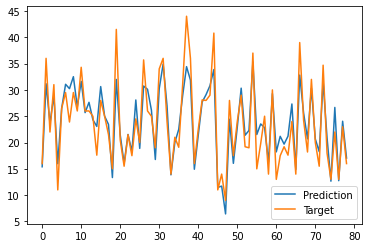

In [27]:
regr = linear_model.LinearRegression()
regr.fit(train_inputs, train_target)

prediction  = regr.predict(test_inputs)
print(regr.score(test_inputs,test_target))

print("Root Mean Squared Error: {:.3f}".format(np.sqrt(np.mean((test_target-prediction)**2))))


prediction = prediction*scaled_features['mpg'][1] + scaled_features['mpg'][0]
test_target1 = test_target*scaled_features['mpg'][1] + scaled_features['mpg'][0]
#Values are unnormalised
plt.plot(prediction, label = 'Prediction')
plt.plot(test_target1, label = 'Target')
plt.legend()


In [28]:
def build_model():
  model = keras.Sequential([
    layers.Dense(1, activation='linear', input_shape= [train_inputs.shape[1]])
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()


EPOCHS = 1000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(train_inputs, train_target, 
                    epochs=EPOCHS, validation_split = 0.2, 
                    callbacks=[early_stop])

Epoch 1/1000
8/8 [==============================] - 1s 30ms/step - loss: 3589.0247 - mae: 59.8549 - mse: 3589.0247 - val_loss: 3527.2510 - val_mae: 59.3268 - val_mse: 3527.2510
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 3460.5408 - mae: 58.7748 - mse: 3460.5408 - val_loss: 3422.2588 - val_mae: 58.4372 - val_mse: 3422.2588
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 3362.1235 - mae: 57.9331 - mse: 3362.1235 - val_loss: 3329.0129 - val_mae: 57.6357 - val_mse: 3329.0129
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 3271.7202 - mae: 57.1488 - mse: 3271.7202 - val_loss: 3240.5220 - val_mae: 56.8646 - val_mse: 3240.5220
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 3184.9551 - mae: 56.3853 - mse: 3184.9551 - val_loss: 3154.8103 - val_mae: 56.1076 - val_mse: 3154.8103
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 3100.2727 - mae: 55.6328 - mse: 3100.2727 - val

8/8 [==============================] - 0s 7ms/step - loss: 634.4108 - mae: 25.1608 - mse: 634.4108 - val_loss: 617.5853 - val_mae: 24.8144 - val_mse: 617.5853
Epoch 48/1000
8/8 [==============================] - 0s 7ms/step - loss: 597.9140 - mae: 24.4258 - mse: 597.9140 - val_loss: 581.4942 - val_mae: 24.0772 - val_mse: 581.4942
Epoch 49/1000
8/8 [==============================] - 0s 7ms/step - loss: 562.5772 - mae: 23.6909 - mse: 562.5772 - val_loss: 546.6643 - val_mae: 23.3437 - val_mse: 546.6643
Epoch 50/1000
8/8 [==============================] - 0s 7ms/step - loss: 528.3710 - mae: 22.9594 - mse: 528.3710 - val_loss: 512.8535 - val_mae: 22.6089 - val_mse: 512.8535
Epoch 51/1000
8/8 [==============================] - 0s 7ms/step - loss: 495.2629 - mae: 22.2261 - mse: 495.2629 - val_loss: 480.2097 - val_mae: 21.8759 - val_mse: 480.2097
Epoch 52/1000
8/8 [==============================] - 0s 7ms/step - loss: 463.2809 - mae: 21.4948 - mse: 463.2809 - val_loss: 448.6707 - val_mae: 21.1

Epoch 96/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.1880 - mae: 0.8049 - mse: 1.1880 - val_loss: 1.1223 - val_mae: 0.8188 - val_mse: 1.1223
Epoch 97/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.1622 - mae: 0.7962 - mse: 1.1622 - val_loss: 1.1407 - val_mae: 0.8441 - val_mse: 1.1407
Epoch 98/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.1317 - mae: 0.7763 - mse: 1.1317 - val_loss: 1.0768 - val_mae: 0.8073 - val_mse: 1.0768
Epoch 99/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.1049 - mae: 0.7653 - mse: 1.1049 - val_loss: 1.1081 - val_mae: 0.8360 - val_mse: 1.1081
Epoch 100/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.0820 - mae: 0.7529 - mse: 1.0820 - val_loss: 1.0401 - val_mae: 0.7963 - val_mse: 1.0401
Epoch 101/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.0598 - mae: 0.7413 - mse: 1.0598 - val_loss: 0.9974 - val_mae: 0.7573 - val_mse: 0.9974
Epoch 102/1000
8/8 [

Epoch 146/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.5242 - mae: 0.4820 - mse: 0.5242 - val_loss: 0.4858 - val_mae: 0.4968 - val_mse: 0.4858
Epoch 147/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.5151 - mae: 0.4736 - mse: 0.5151 - val_loss: 0.4656 - val_mae: 0.4814 - val_mse: 0.4656
Epoch 148/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.5138 - mae: 0.4746 - mse: 0.5138 - val_loss: 0.4862 - val_mae: 0.4967 - val_mse: 0.4862
Epoch 149/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4957 - mae: 0.4663 - mse: 0.4957 - val_loss: 0.4700 - val_mae: 0.4870 - val_mse: 0.4700
Epoch 150/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4909 - mae: 0.4623 - mse: 0.4909 - val_loss: 0.4464 - val_mae: 0.4705 - val_mse: 0.4464
Epoch 151/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.4850 - mae: 0.4665 - mse: 0.4850 - val_loss: 0.4736 - val_mae: 0.4870 - val_mse: 0.4736
Epoch 152/1000
8

Epoch 196/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.3226 - mae: 0.3780 - mse: 0.3226 - val_loss: 0.2814 - val_mae: 0.3589 - val_mse: 0.2814
Epoch 197/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.3281 - mae: 0.3825 - mse: 0.3281 - val_loss: 0.2752 - val_mae: 0.3558 - val_mse: 0.2752
Epoch 198/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.3205 - mae: 0.3736 - mse: 0.3205 - val_loss: 0.2868 - val_mae: 0.3609 - val_mse: 0.2868
Epoch 199/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.3163 - mae: 0.3700 - mse: 0.3163 - val_loss: 0.2855 - val_mae: 0.3599 - val_mse: 0.2855
Epoch 200/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.3180 - mae: 0.3764 - mse: 0.3180 - val_loss: 0.2611 - val_mae: 0.3490 - val_mse: 0.2611
Epoch 201/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.3155 - mae: 0.3724 - mse: 0.3155 - val_loss: 0.2757 - val_mae: 0.3531 - val_mse: 0.2757
Epoch 202/1000
8

Epoch 246/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2809 - mae: 0.3594 - mse: 0.2809 - val_loss: 0.2121 - val_mae: 0.3073 - val_mse: 0.2121
Epoch 247/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2718 - mae: 0.3529 - mse: 0.2718 - val_loss: 0.2155 - val_mae: 0.3083 - val_mse: 0.2155
Epoch 248/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2769 - mae: 0.3633 - mse: 0.2769 - val_loss: 0.2111 - val_mae: 0.3098 - val_mse: 0.2111
Epoch 249/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.2781 - mae: 0.3540 - mse: 0.2781 - val_loss: 0.2217 - val_mae: 0.3169 - val_mse: 0.2217
Epoch 250/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2732 - mae: 0.3517 - mse: 0.2732 - val_loss: 0.2097 - val_mae: 0.3100 - val_mse: 0.2097
Epoch 251/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2807 - mae: 0.3566 - mse: 0.2807 - val_loss: 0.2088 - val_mae: 0.3090 - val_mse: 0.2088
Epoch 252/1000
8

Epoch 296/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2666 - mae: 0.3534 - mse: 0.2666 - val_loss: 0.1924 - val_mae: 0.2973 - val_mse: 0.1924
Epoch 297/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2599 - mae: 0.3469 - mse: 0.2599 - val_loss: 0.1929 - val_mae: 0.2979 - val_mse: 0.1929
Epoch 298/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2678 - mae: 0.3521 - mse: 0.2678 - val_loss: 0.2052 - val_mae: 0.3121 - val_mse: 0.2052
Epoch 299/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2680 - mae: 0.3554 - mse: 0.2680 - val_loss: 0.2041 - val_mae: 0.3104 - val_mse: 0.2041
Epoch 300/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2641 - mae: 0.3516 - mse: 0.2641 - val_loss: 0.1884 - val_mae: 0.2983 - val_mse: 0.1884
Epoch 301/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2724 - mae: 0.3496 - mse: 0.2724 - val_loss: 0.1949 - val_mae: 0.3000 - val_mse: 0.1949
Epoch 302/1000
8

Epoch 346/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2653 - mae: 0.3494 - mse: 0.2653 - val_loss: 0.1754 - val_mae: 0.2877 - val_mse: 0.1754
Epoch 347/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2574 - mae: 0.3466 - mse: 0.2574 - val_loss: 0.1894 - val_mae: 0.3005 - val_mse: 0.1894
Epoch 348/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2565 - mae: 0.3485 - mse: 0.2565 - val_loss: 0.1921 - val_mae: 0.3032 - val_mse: 0.1921
Epoch 349/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2586 - mae: 0.3524 - mse: 0.2586 - val_loss: 0.1760 - val_mae: 0.2879 - val_mse: 0.1760
Epoch 350/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2530 - mae: 0.3452 - mse: 0.2530 - val_loss: 0.1750 - val_mae: 0.2874 - val_mse: 0.1750
Epoch 351/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2541 - mae: 0.3451 - mse: 0.2541 - val_loss: 0.1988 - val_mae: 0.3127 - val_mse: 0.1988
Epoch 352/1000
8

Epoch 396/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2569 - mae: 0.3502 - mse: 0.2569 - val_loss: 0.1935 - val_mae: 0.3119 - val_mse: 0.1935
Epoch 397/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2503 - mae: 0.3451 - mse: 0.2503 - val_loss: 0.1681 - val_mae: 0.2838 - val_mse: 0.1681
Epoch 398/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2610 - mae: 0.3571 - mse: 0.2610 - val_loss: 0.1677 - val_mae: 0.2832 - val_mse: 0.1677
Epoch 399/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2481 - mae: 0.3424 - mse: 0.2481 - val_loss: 0.2029 - val_mae: 0.3248 - val_mse: 0.2029
Epoch 400/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2544 - mae: 0.3520 - mse: 0.2544 - val_loss: 0.1729 - val_mae: 0.2958 - val_mse: 0.1729
Epoch 401/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2544 - mae: 0.3448 - mse: 0.2544 - val_loss: 0.1860 - val_mae: 0.3017 - val_mse: 0.1860
Epoch 402/1000
8

Root Mean Squared Error: 1.333


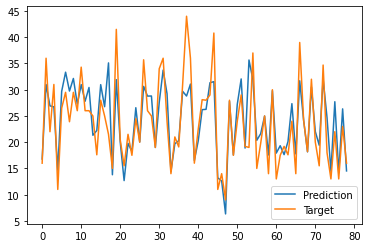

In [29]:
prediction = model(test_inputs)
print("Root Mean Squared Error: {:.3f}".format(np.sqrt(np.mean((test_target-prediction)**2))))

prediction = prediction*scaled_features['mpg'][1] + scaled_features['mpg'][0]
test_target1 = test_target*scaled_features['mpg'][1] + scaled_features['mpg'][0]
#Values are unnormalised
plt.plot(prediction, label = 'Prediction')
plt.plot(test_target1, label = 'Target')
plt.legend()